In [25]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [54]:
def poly_fit_graph(free, paid):
    fp1 = np.polyfit(free, paid, 1)
    fx = np.linspace(1, 150, 150)
    f1 = np.poly1d(fp1)
    plt.figure(figsize=(10,10))
    plt.scatter(free, paid, s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel('무료체험')
    plt.ylabel('결제자')
    plt.grid()
    plt.show()

In [10]:
df = pd.read_csv("./data/free_join_purchase_user.csv", encoding="utf-8")
df.head()

,날짜,무료체험,결제,릴리즈전후
0,01/19 금,3,2,전
1,01/20 토,15,1,전
2,01/21 일,1,5,전
3,01/22 월,7,1,전
4,01/23 화,4,0,전


In [11]:
df.describe()

,무료체험,결제
count,55.000000,55.000000
mean,24.818182,3.109091
std,25.048169,2.499428
min,1.000000,0.000000
25%,7.000000,1.000000
50%,19.000000,2.000000
75%,27.000000,4.000000
max,132.000000,10.000000


In [22]:
df.set_index('날짜', inplace=True)

In [23]:
free = df['무료체험']
paid = df['결제']

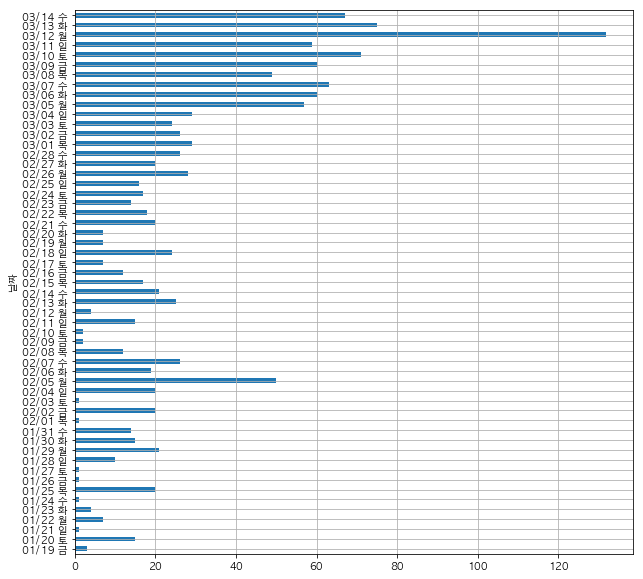

In [45]:
plt.figure()
free.plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

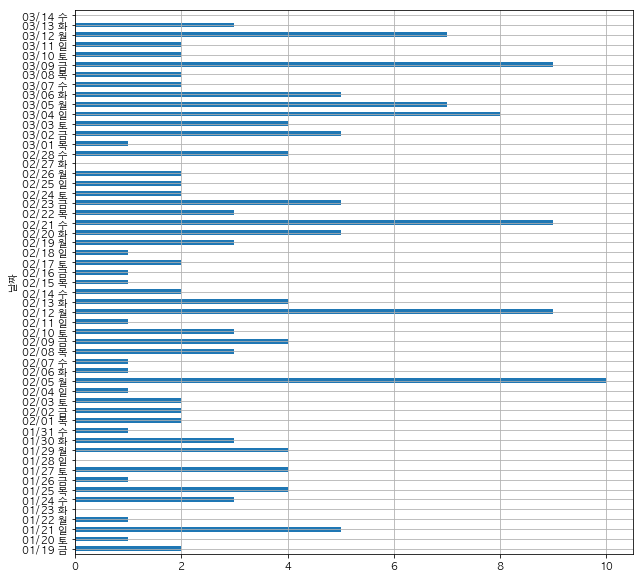

In [42]:
plt.figure()
paid.plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

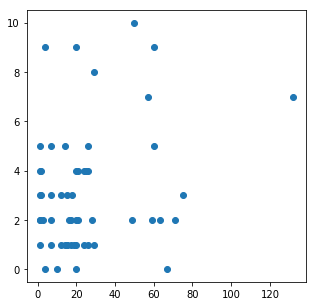

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(free, paid)
plt.show()

In [15]:
np.corrcoef(free, paid)

array([[ 1.        ,  0.26150899],
       [ 0.26150899,  1.        ]])

## 0.26150899 약한 상관관계..

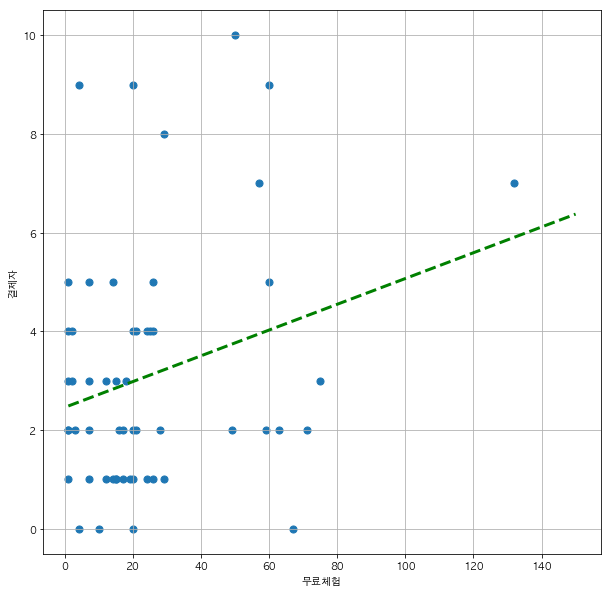

In [40]:
fp1 = np.polyfit(free, paid, 1)
fx = np.linspace(1, 150, 150)
f1 = np.poly1d(fp1)
plt.figure(figsize=(10,10))
plt.scatter(free, paid, s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('무료체험')
plt.ylabel('결제자')
plt.grid()
plt.show()

- 140명 무료체험을 해도.. 6명 결제!?

In [48]:
df_before = df[df["릴리즈전후"] == "전"]
df_before.head()

,무료체험,결제,릴리즈전후
날짜,,,
01/19 금,3,2,전
01/20 토,15,1,전
01/21 일,1,5,전
01/22 월,7,1,전
01/23 화,4,0,전


In [50]:
df_before.describe()

,무료체험,결제
count,45.000000,45.000000
mean,14.933333,2.933333
std,10.491122,2.396968
min,1.000000,0.000000
25%,7.000000,1.000000
50%,15.000000,2.000000
75%,21.000000,4.000000
max,50.000000,10.000000


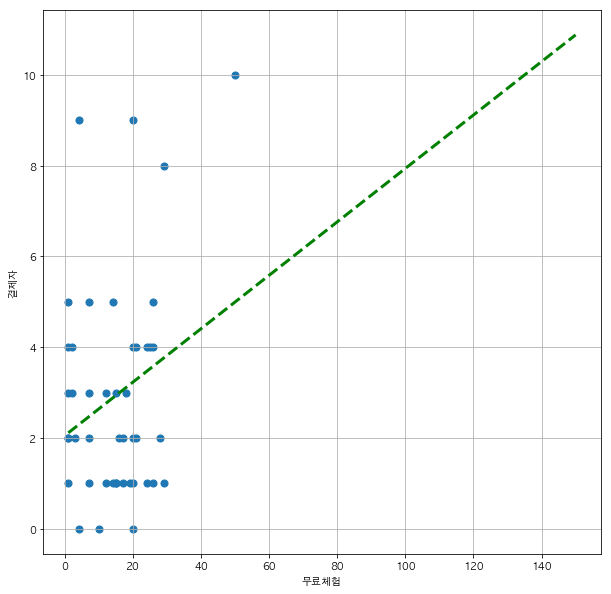

In [56]:
poly_fit_graph(df_before['무료체험'], df_before['결제'])

In [51]:
df_after = df[df["릴리즈전후"] == "후"]
df_after.head()

,무료체험,결제,릴리즈전후
날짜,,,
03/05 월,57,7,후
03/06 화,60,5,후
03/07 수,63,2,후
03/08 목,49,2,후
03/09 금,60,9,후


In [52]:
df_after.describe()

,무료체험,결제
count,10.00000,10.000000
mean,69.30000,3.900000
std,23.22379,2.923088
min,49.00000,0.000000
25%,59.25000,2.000000
50%,61.50000,2.500000
75%,70.00000,6.500000
max,132.00000,9.000000


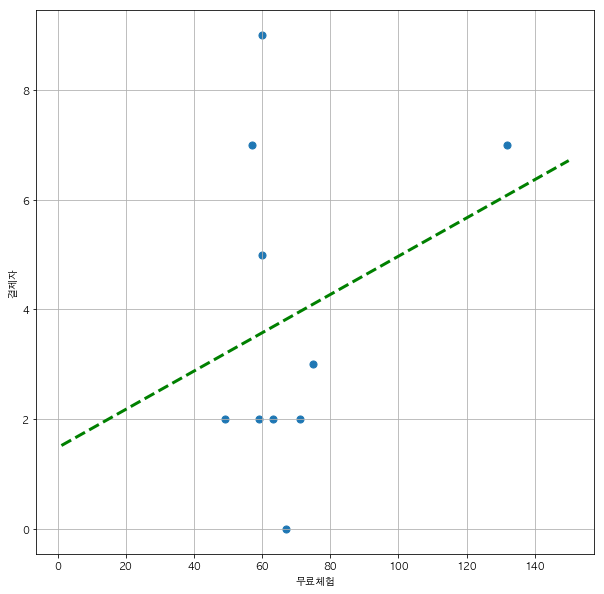

In [57]:
poly_fit_graph(df_after['무료체험'], df_after['결제'])